<h1 style="text-align: center;font-size: 32px;">QTM151 Final Project</h1>

<p style="text-align: center; font-size: 18px;">Group Members: Maxine, Sylvia, Lucy, Davis</p>



## Introduction

<font size = "5">
What's F1?

<font size = "5">
Data Description

<font size = "3">
We use two datasets:

<font size = "1">

### 1. ``` driver_standings``` 
<font size = "3">
Contains data on driver performance, including:

- **points**: Driver points for the season.
- **wins**: Number of race wins in the season.
- **driverId**: A unique identifier linking to the `drivers` table.

This dataset is essential for performance metrics.
<font size = "1">

### 2. ``` driver``` 
<font size = "3">

Provides driver details, such as:

- **nationality**: Driver’s nationality.
- **driverId**: Unique driver identifier for merging.

This dataset allows us to group and compare drivers by nationality.

### Merging and Analysis
By merging these datasets, we can comprehensively analyze nationality-based performance.


## Data Cleaning Process

In [15]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:

#import driver_standings and drivers
driver_standings = pd.read_csv('data-raw/driver_standings.csv')
drivers = pd.read_csv('data-raw/drivers.csv')


#view tables
display(driver_standings)
display(drivers)


#merge tables with common variable `driverId`
merged_data = pd.merge(driver_standings, drivers, on = 'driverId', how = 'inner')
display(merged_data)


#group racers by nationality, and select to keep columns `total_points`, `wins`, and `num_drivers`
nationality_data = merged_data.groupby('nationality').agg(
   total_points=('points', 'sum'),
   wins=('wins', 'sum'),
   num_drivers=('driverId', 'count')
).reset_index()

display(nationality_data)


#order nationalities by descending `total_points` and `wins`
nationality_data_sorted = nationality_data.sort_values(by = ['total_points', 'wins'], ascending = [False, False])
display(nationality_data_sorted.head(5))


#Therefore, we can see the top five best scoring nationalities in F1 racing are British, German, Finnish, French, and Brazilian



,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url
0,1,18,1,10.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,8.0,2,2,0,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,6.0,3,3,0,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,5.0,4,4,0,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,4.0,5,5,0,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0,stroll,18,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll
33898,71842,1098,852,0.0,17,17,0,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
33899,71843,1098,830,0.0,18,18,0,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
33900,71844,1098,856,0.0,19,19,0,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries


,nationality,total_points,wins,num_drivers
0,American,6423.00,225,3837
1,American-Italian,0.00,0,4
2,Argentine,4219.68,226,640
3,Argentine-Italian,0.00,0,9
4,Australian,27002.00,335,949
5,Austrian,8256.50,310,825
6,Belgian,2733.00,56,866
7,Brazilian,30831.50,853,2063
8,British,96290.20,2508,5822
9,Canadian,4925.00,139,484


,nationality,total_points,wins,num_drivers
8,British,96290.20,2508,5822
19,German,79442.00,1746,2711
17,Finnish,44559.50,495,1169
18,French,31216.31,730,3515
7,Brazilian,30831.50,853,2063


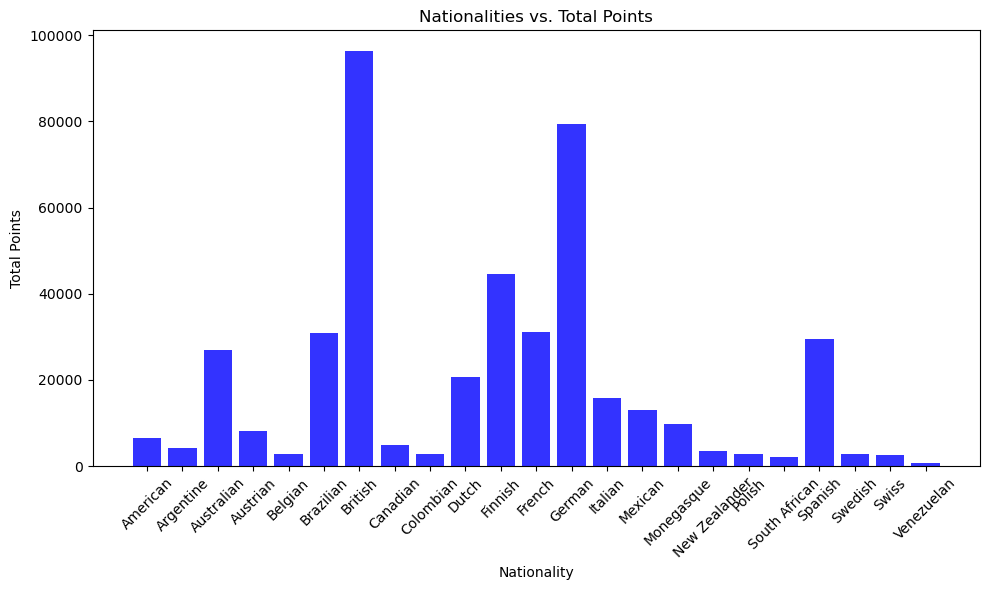

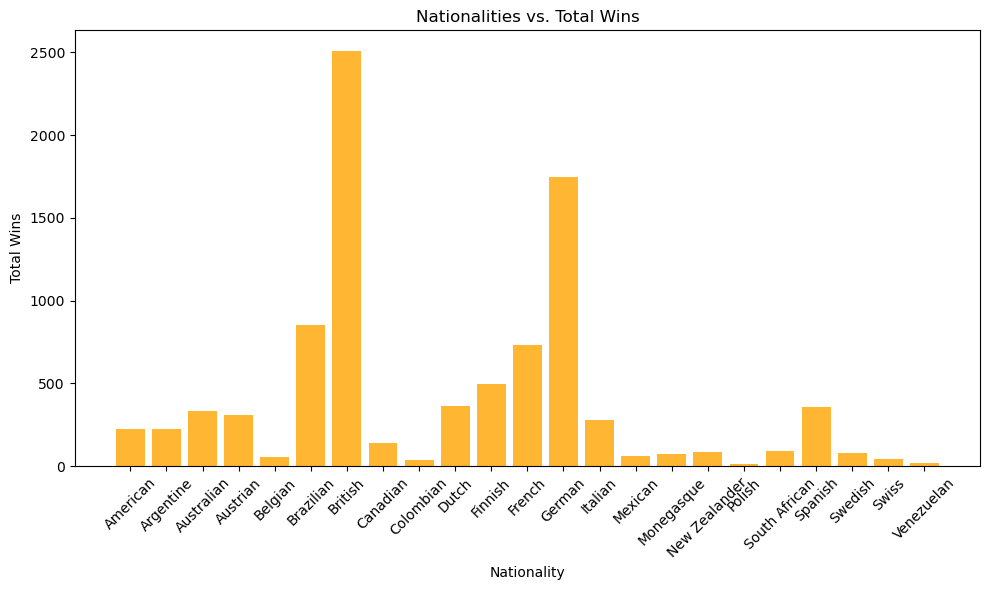

In [17]:
# Sort the data by points and wins in descending order, then keep only the nationality, wins, and points columns.
individual_data= merged_data.sort_values(by = ['points', 'wins'], ascending = [False, False])[['nationality', 'wins', 'points']]
# Display the first 5 rows of the resulting data.
individual_data.head(5)


# Therefore, we can see the top five individual scoring driver are from Dutch and British.


# Filter out nationalities with low data
# Define thresholds for filtering
threshold_drivers = 5  # Minimum number of drivers
threshold_points = 100  # Minimum total points
threshold_wins = 1  # Minimum total wins


# Apply filters to remove nationalities with insufficient data
filtered_nationality_data = nationality_data[
   (nationality_data['num_drivers'] >= threshold_drivers) &
   (nationality_data['total_points'] >= threshold_points) &
   (nationality_data['wins'] >= threshold_wins)
]


# Define positions for the bars
x = np.arange(len(filtered_nationality_data['nationality']))  # Get the indices for the x-axis


# Plot for Total Points
plt.figure(figsize=(10, 6))
plt.bar(x, filtered_nationality_data['total_points'], color='blue', alpha=0.8)
plt.xticks(x, filtered_nationality_data['nationality'], rotation=45)
plt.xlabel('Nationality')
plt.ylabel('Total Points')
plt.title('Nationalities vs. Total Points')
plt.tight_layout()
plt.show()


# Plot for Total Wins
plt.figure(figsize=(10, 6))
plt.bar(x, filtered_nationality_data['wins'], color='orange', alpha=0.8)
plt.xticks(x, filtered_nationality_data['nationality'], rotation=45)
plt.xlabel('Nationality')
plt.ylabel('Total Wins')
plt.title('Nationalities vs. Total Wins')
plt.tight_layout()
plt.show()


## Results

## Discussion